## Region-Wise Subplots

In [131]:
import scipy.io
import matplotlib.pyplot as plt
import os
import xarray as xr

In [10]:
file = scipy.io.loadmat('ppt_zone_hr_JJA.mat')

jja_tp_r99pa1hr = 'JJA.nc'
jja_file = xr.open_dataarray(jja_tp_r99pa1hr)

In [3]:
file['ExPPT_ann_zone'].shape

(24, 41, 7)

In [23]:
nldas_avg_early_decade = file['ExPPT_ann_zone'][:,:10].mean(axis=1)
nldas_avg_last_decade  = file['ExPPT_ann_zone'][:,30:].mean(axis=1)

era5_avg_early_decade = jja_file[:10].mean(dim="year",skipna=True)
era5_avg_last_decade = jja_file[30:].mean(dim="year",skipna=True)


In [24]:
# NLDAS

# Northeast ---> Southwest
# Midwest   ---> NGP
# Southeast  ---> SGP
# NGP   ----> Midwest
# SGP ---> Southeast
# Southwest ---> Northwest
# Northwest ---> Northeast


temp_avg_early_dec  = nldas_avg_early_decade.copy()
temp_temp_avg_early_dec  = temp_avg_early_dec.copy()
temp_avg_early_dec[:,0] = temp_temp_avg_early_dec[:,5]
temp_avg_early_dec[:,1] = temp_temp_avg_early_dec[:,3]

temp_avg_early_dec[:,2] = temp_temp_avg_early_dec[:,4]
temp_avg_early_dec[:,3] = temp_temp_avg_early_dec[:,1]

temp_avg_early_dec[:,4] = temp_temp_avg_early_dec[:,2]
temp_avg_early_dec[:,5] = temp_temp_avg_early_dec[:,6]

temp_avg_early_dec[:,6] = temp_temp_avg_early_dec[:,0]

In [25]:
temp_avg_last_dec  = nldas_avg_last_decade.copy()
temp_temp_avg_last_dec  = temp_avg_last_dec.copy()
temp_avg_last_dec[:,0] = temp_temp_avg_last_dec[:,5]
temp_avg_last_dec[:,1] = temp_temp_avg_last_dec[:,3]

temp_avg_last_dec[:,2] = temp_temp_avg_last_dec[:,4]
temp_avg_last_dec[:,3] = temp_temp_avg_last_dec[:,1]

temp_avg_last_dec[:,4] = temp_temp_avg_last_dec[:,2]
temp_avg_last_dec[:,5] = temp_temp_avg_last_dec[:,6]

temp_avg_last_dec[:,6] = temp_temp_avg_last_dec[:,0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

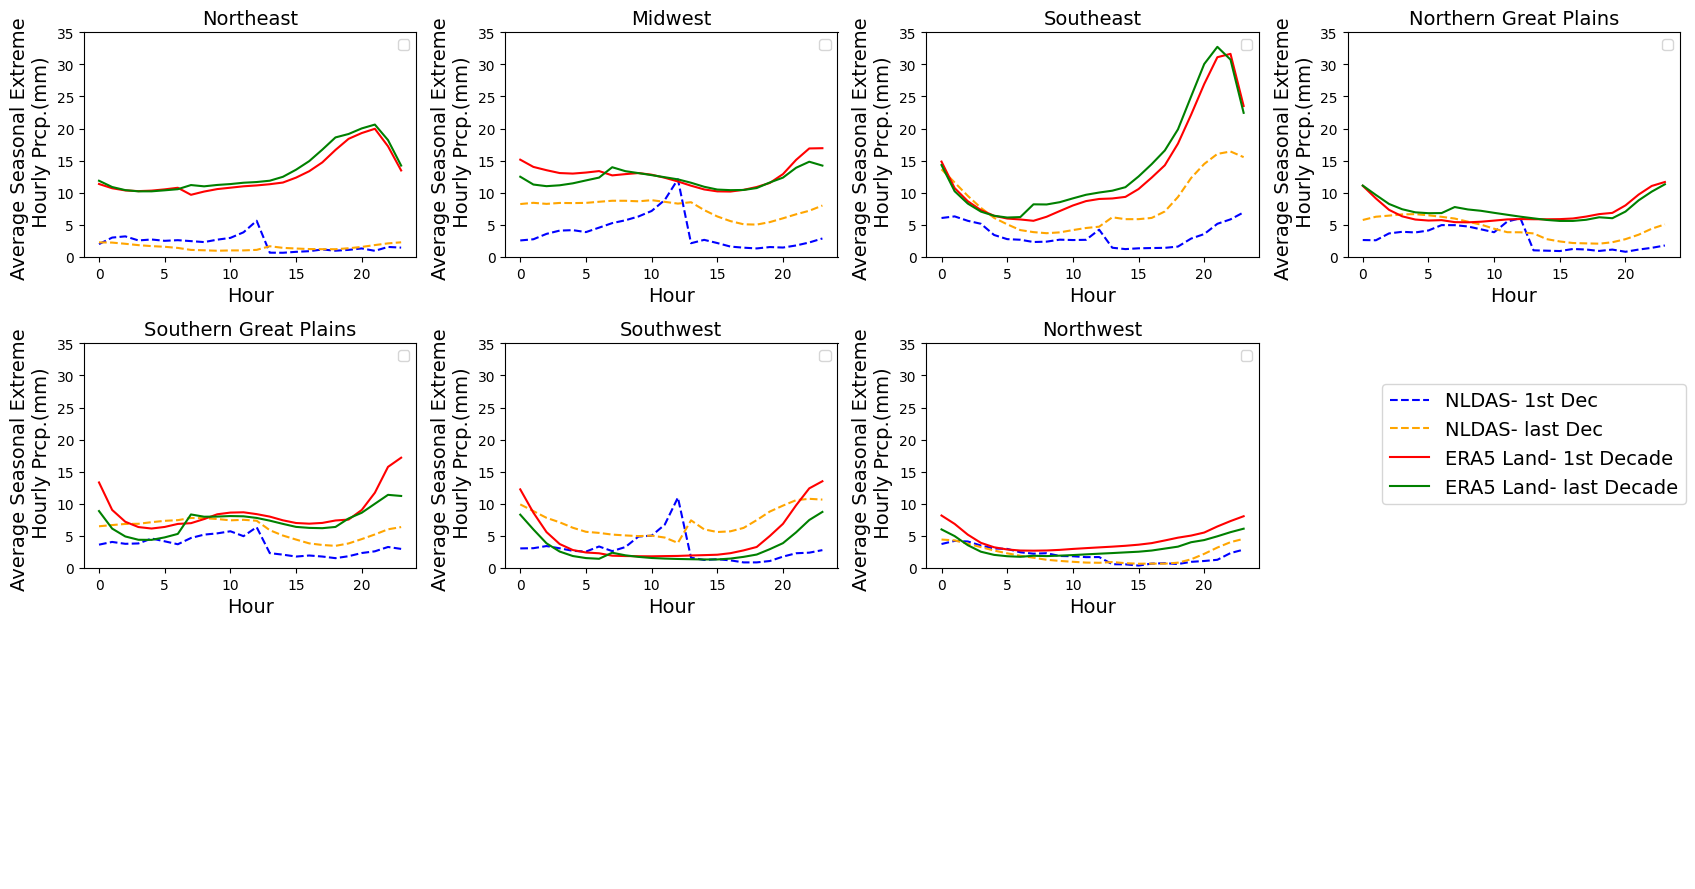

In [26]:
arrays = [temp_avg_early_dec, temp_avg_last_dec, era5_avg_early_decade, era5_avg_last_decade]

regions = ['Northeast', 'Midwest', 'Southeast', 'Northern Great Plains', 'Southern Great Plains', 'Southwest', 'Northwest']

num_rows = 3
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 9))

num_regions = len(regions)

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index >= num_regions:
            axes[i, j].axis('off')
            continue
        
        l1 = axes[i, j].plot(arrays[0][:, index], linestyle='--', color='blue')
        l2 = axes[i, j].plot(arrays[1][:, index], linestyle='--', color='orange')

        l3 = axes[i, j].plot((arrays[2][:, index]*1000), linestyle='-', color='red')
        l4 = axes[i, j].plot((arrays[3][:, index]*1000), linestyle='-', color='green')

        axes[i, j].set_ylim(0, 35)
        axes[i, j].set_title(regions[index], fontsize=14)
        axes[i, j].set_xlabel('Hour', fontsize=14)
        axes[i, j].set_ylabel('Average Seasonal Extreme \n Hourly Prcp.(mm)', fontsize=14)
        axes[i, j].legend()

lines_labels= ['NLDAS- 1st Dec', 'NLDAS- last Dec', 'ERA5 Land- 1st Decade', 'ERA5 Land- last Decade']

fig.legend([l1,l2,l3,l4], labels = lines_labels , loc='center right', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
## Wet Hour Prcp

In [ ]:
## Temporal Agg

In [8]:
import numpy as np

In [9]:
%cd /N/project/Zli_lab/ERA5_land_data_recalculated
curr_data_path = os.getcwd()

/N/project/Zli_lab/ERA5_land_data_recalculated


In [10]:
path=[]
year_ind = 0
for year in range(1979, 2024):
    path.append(os.path.join(curr_data_path, "R99pw1hr/wet_hour_prcp/", f"Hourly_Total_Precipitation_T_{str(6).zfill(2)}{year}.nc"))
    path.append(os.path.join(curr_data_path, "R99pw1hr/wet_hour_prcp/", f"Hourly_Total_Precipitation_T_{str(7).zfill(2)}{year}.nc"))
    path.append(os.path.join(curr_data_path, "R99pw1hr/wet_hour_prcp/", f"Hourly_Total_Precipitation_T_{str(8).zfill(2)}{year}.nc"))
    year_ind+=1
print(year_ind)

45


In [121]:
temp_agg_jja = []
        
for month in range(0,145,3):
    month_1 = xr.open_dataset(path[month])
    month_2 = xr.open_dataset(path[month + 1])
    month_3 = xr.open_dataset(path[month + 2])
    concatenated_months = np.concatenate([month_1.R99pa1hr.values, month_2.R99pa1hr.values, month_3.R99pa1hr.values], axis=0)
    
    for hour in range(0,24):
        sum_month = np.nansum(concatenated_months[hour::24], axis=0)
        temp_agg_jja.append(sum_month)
        print(month,hour)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
21 20
21 21
21 22
21 23
24 0
24 1
24 2
24 3
24 4

IndexError: list index out of range

In [12]:
all_data = xr.open_mfdataset(path)

In [126]:
data_arr = np.array(temp_agg_jja).reshape(45,24,261,591)
latitude = xr.DataArray(all_data['latitude'].data, dims='latitude', coords={'latitude': all_data['latitude'].data})
longitude = xr.DataArray(all_data['longitude'].data, dims='longitude', coords={'longitude': all_data['longitude'].data})
hour = xr.DataArray(np.arange(0,24), dims='hour', coords={'hour': np.arange(0,24)})
year = xr.DataArray(np.arange('1979','2024',dtype='datetime64[Y]'), dims='year', coords={'year': np.arange('1979','2024',dtype='datetime64[Y]')})
combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'hour': hour, 'year':year})
combined_ds['temp_agg'] = (('year', 'hour', 'latitude', 'longitude'), data_arr)

combined_ds.to_netcdf('R99pw1hr/temporal_aggregation/JJA.nc')

/tmp/ipykernel_538107/517030890.py:5: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  year = xr.DataArray(np.arange('1979','2024',dtype='datetime64[Y]'), dims='year', coords={'year': np.arange('1979','2024',dtype='datetime64[Y]')})
/tmp/ipykernel_538107/517030890.py:5: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 

In [130]:
combined_ds.temp_agg[0][1][220][200]

<xarray.DataArray 'temp_agg' ()> Size: 8B
array(0.01131704)
Coordinates:
    latitude   float32 4B 28.0
    longitude  float32 4B -105.0
    hour       int64 8B 1
    year       datetime64[ns] 8B 1979-01-01

In [132]:
jja_tp_r99pa1hr = 'R99pw1hr/spatial_aggregation/JJA.nc'
jja_file = xr.open_dataarray(jja_tp_r99pa1hr)

In [139]:
jja_file[20:]

<xarray.DataArray (year: 25, hour: 24, regions: 7)> Size: 34kB
[4200 values with dtype=float64]
Coordinates:
  * year     (year) datetime64[ns] 200B 1999-01-01 2000-01-01 ... 2023-01-01
  * hour     (hour) int32 96B 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
  * regions  (regions) object 56B 'NE' 'MW' 'SE' 'NGP' 'SGP' 'SW' 'NW'

In [169]:
std_dev_early_decade

<xarray.DataArray (regions: 7)> Size: 56B
array([0.00034338, 0.00049449, 0.00067906, 0.00022769, 0.00016819,
       0.00041524, 0.00029028])
Coordinates:
  * regions  (regions) object 56B 'NE' 'MW' 'SE' 'NGP' 'SGP' 'SW' 'NW'

In [145]:
era5_avg_early_decade = jja_file[:10].mean(dim="year",skipna=True)
era5_avg_last_decade = jja_file[30:].mean(dim="year",skipna=True)

In [170]:
era5_std_early_decade = jja_file[:10].std(dim="year",skipna=True)
era5_std_last_decade = jja_file[30:].std(dim="year",skipna=True)

In [174]:
# sample_size_early = 10
# sample_size_last = len(jja_file) - 30

# # Calculate standard deviation and SEM for both periods
# std_dev_early_decade = np.std(era5_avg_early_decade, axis=0, ddof=1)
# sem_early_decade = std_dev_early_decade / np.sqrt(sample_size_early)

# std_dev_last_decade = np.std(era5_avg_last_decade, axis=0, ddof=1)
# sem_last_decade = std_dev_last_decade / np.sqrt(sample_size_last)

# Calculate the 95% confidence intervals
# z_score = 1.96  # for 95% confidence

ci_early_decade_lower = era5_avg_early_decade -  era5_std_early_decade
ci_early_decade_upper = era5_avg_early_decade +  era5_std_early_decade

ci_last_decade_lower = era5_avg_last_decade -  era5_std_last_decade
ci_last_decade_upper = era5_avg_last_decade +  era5_std_last_decade

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

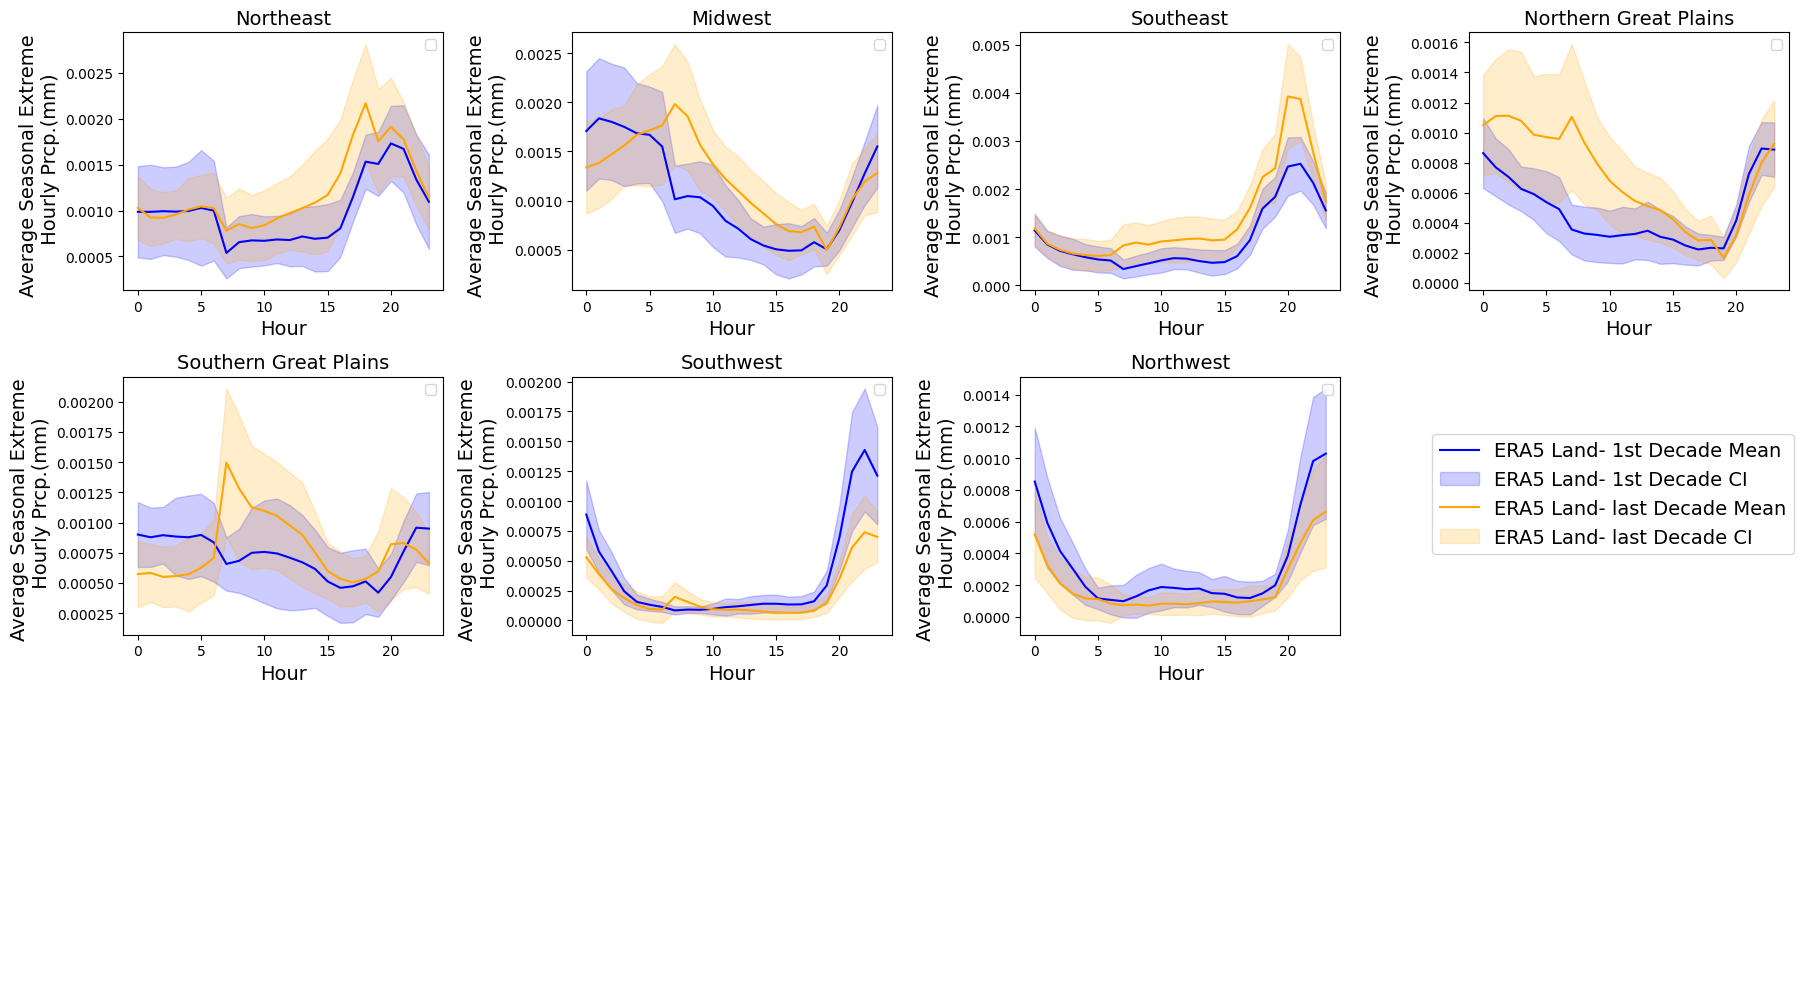

In [175]:
arrays = [era5_avg_early_decade, era5_avg_last_decade]

regions = ['Northeast', 'Midwest', 'Southeast', 'Northern Great Plains', 'Southern Great Plains', 'Southwest', 'Northwest']

num_rows = 3
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 10))

num_regions = len(regions)

line_labels = []
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index >= num_regions:
            axes[i, j].axis('off')
            continue
        
        l1 = axes[i, j].plot(arrays[0][:, index], linestyle='-', color='blue')
        
        l2 = axes[i, j].fill_between(range(arrays[0].shape[0]), ci_early_decade_lower[:, index], ci_early_decade_upper[:, index], color='blue', alpha=0.2)
        
        l3 = axes[i, j].plot(arrays[1][:, index], linestyle='-', color='orange')
        
        l4 = axes[i, j].fill_between(range(arrays[1].shape[0]), ci_last_decade_lower[:, index], ci_last_decade_upper[:, index], color='orange', alpha=0.2)

        axes[i, j].set_title(regions[index], fontsize=14)
        axes[i, j].set_xlabel('Hour', fontsize=14)
        axes[i, j].set_ylabel('Average Seasonal Extreme \n Hourly Prcp.(mm)', fontsize=14)
        axes[i, j].legend()


        line_labels = [l1,l2,l3,l4]

fig.legend(line_labels, labels=['ERA5 Land- 1st Decade Mean', 'ERA5 Land- 1st Decade CI', 'ERA5 Land- last Decade Mean', 'ERA5 Land- last Decade CI'], loc='center right', fontsize=14)

plt.tight_layout()
plt.show()